## MODELO LINEAL GENERALIZADO

### 1. Importar paquetes y librerías

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate, RepeatedKFold, ShuffleSplit, learning_curve
from scipy import stats
from sklearn.metrics import r2_score, median_absolute_error,mean_squared_error
from statsmodels import graphics

from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
pd.set_option("display.max_rows", 10)

### 2. Importar datos

In [50]:
cacao=pd.read_excel("TODAS LAS VARIABLES Y TOTAL.xlsx")

In [51]:
#Eliminar valores faltantes del conjunto de datos

cacao=cacao.dropna()

In [53]:
#Definir variables exógenas

x=cacao[[   "Uso eficiente del agua", "Transpiracion",
            "Diametro tronco (cm)",
            "P", "MO", "Na",
            "Radiacion", "Temperatura", "Humedad", "Lluvias acumuladas (mms)" ]]

In [54]:
#Definir variable endógena

y=cacao[["Rendimiento"]]

### Histograma variable respuesta

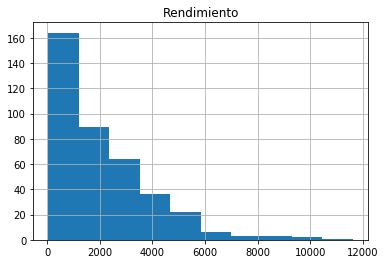

In [55]:
Respuesta=["Rendimiento"]
cacao.hist(Respuesta);

### 3. Desarollo modelo predictivo

### Resultados predicción modelo lineal generalizado

In [ ]:
glm_gamma = sm.GLM(y, x, family=sm.families.Gamma(link=sm.genmod.families.links.log))
glm_results = glm_gamma.fit()
print(glm_results.summary())

In [59]:
# Las variables cuyo valor p sea menor a 0.05 serán significativas por lo que se almacenan en la lista varSelec

varSelec=[]
for i in range(len(glm_results.pvalues)):
    if glm_results.pvalues[i] < 0.05:
        varSelec.append(glm_results.pvalues.index[i])

### 4. Validación

### Hold out validation

In [62]:
x=cacao[varSelec]
y=cacao.Rendimiento

R_2=[]
RMSE=[]
MAE=[]
pred=[0]
obs=[0]

for i in range(20):
    X1_train,X1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.2) #Hacer partición de datos en entrenamiento y prueba

    glm_gamma=sm.GLM(y1_train,X1_train,family=sm.families.Gamma(link = sm.genmod.families.links.log))
    res=glm_gamma.fit()
    
    r_2=r2_score(y1_test,res.predict(X1_test))
    R_2.append(r_2)
    RMSE.append(np.linalg.norm((y1_test-res.predict(X1_test)),2)/np.sqrt(len(y1_test)))
    MAE.append(median_absolute_error(y1_test,res.predict(X1_test)))
    
    if r_2 >= max(R_2):
        pred[0] = res.predict(X1_test)
        obs[0] = y1_test
    
print("R^2: %.4f" % np.mean(R_2))
print("RMSE: %.4f" % np.mean(RMSE))
print("MAE: %.4f" % np.mean(MAE))

R^2: 0.1742
RMSE: 1717.3700
MAE: 1057.2611


In [63]:
datos = np.asarray(RMSE)
np.savetxt("RMSE_GLM.csv",   # Archivo de salida
           datos.T,        # Trasponemos los datos
           fmt="%d",       # Usando números enteros
           delimiter=",")  # Para que sea un archivo CSV